In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set()

In [ ]:
fields = ['country', 'points','price', 'variety']
wineRevs = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/M5/Clase 7/wine_reviews.csv',
                       usecols = fields)
wineRevs.head()

,country,points,price,variety
0,Italy,87,NaN,White Blend
1,Portugal,87,15.0,Portuguese Red
2,US,87,14.0,Pinot Gris
3,US,87,13.0,Riesling
4,US,87,65.0,Pinot Noir


> ### **Graficando con matplot lib**

[Text(0, 0.5, 'points'), Text(0.5, 0, 'price')]

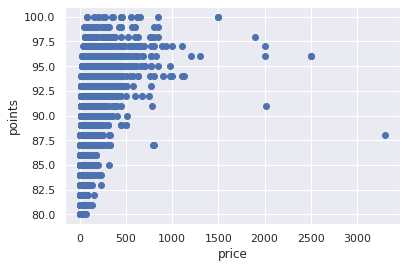

In [ ]:
x = wineRevs.price.values
y = wineRevs.points.values

fig = plt.figure()
ax = plt.axes()

ax.scatter(x, y)
ax.set(xlabel='price', ylabel='points')

> ## **Graficando con Seaborn**

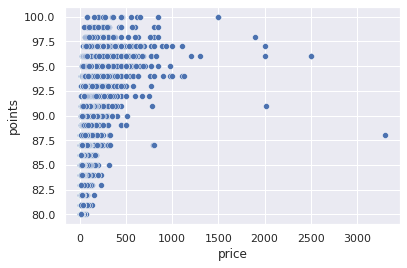

In [ ]:
ax = sns.scatterplot(x='price', y='points', data=wineRevs)

> ### **Scatter Plots With Labels**

In [ ]:
countries = ['Argentina', 'Chile', 'Spain']
filteredWineRevs = wineRevs[wineRevs['country'].isin(countries)]
filteredWineRevs.head()

,country,points,price,variety
5,Spain,87,15.0,Tempranillo-Merlot
16,Argentina,87,30.0,Malbec
17,Argentina,87,13.0,Malbec
18,Spain,87,28.0,Tempranillo Blend
36,Chile,86,15.0,Viognier-Chardonnay


**Ejercicio:** Siguiendo lo realizado en el notebook anterior, realice un gráfico scatter plot de precio vs puntaje en el cual diferencie por color el pais de origen de cada vino (Argentina, España o Chile).

[Text(0, 0.5, 'points'), Text(0.5, 0, 'price')]

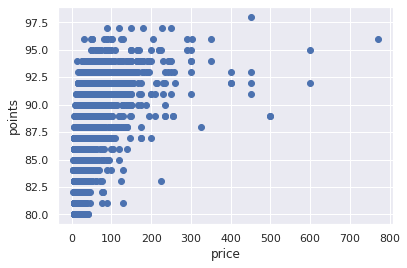

In [ ]:
x = filteredWineRevs.price.values
y = filteredWineRevs.points.values

fig = plt.figure()
ax = plt.axes()

ax.plot()
ax.scatter(x, y)
ax.set(xlabel='price', ylabel='points')